# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargamos todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math as mt
from math import factorial
from scipy import stats as st


## Carga de datos

In [2]:
# Cargamos los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv ('/datasets/megaline_calls.csv')
df_internet = pd.read_csv ('/datasets/megaline_internet.csv')
df_messages = pd.read_csv ('/datasets/megaline_messages.csv')
df_plans = pd.read_csv ('/datasets/megaline_plans.csv')
df_users = pd.read_csv ('/datasets/megaline_users.csv')

## Preparando los datos

In [3]:
# Aquí buscamos ver de manera general errores o ver cual es el estado de las DataFrames

In [4]:
df_calls.info(show_counts=True)
print()
print(df_calls.isna().sum())
print()
print(df_calls.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

id           0
user_id      0
call_date    0
duration     0
dtype: int64

          id  user_id   call_date  duration
0    1000_93     1000  2018-12-27      8.52
1   1000_145     1000  2018-12-27     13.66
2   1000_247     1000  2018-12-27     14.48
3   1000_309     1000  2018-12-28      5.76
4   1000_380     1000  2018-12-30      4.22
5   1000_388     1000  2018-12-31      2.20
6   1000_510     1000  2018-12-27      5.75
7   1000_521     1000  2018-12-28     14.18
8   1000_530     1000  2018-12-28      5.77
9   1000_544     1000  2018-12-26      4.40
10  1000_693     1000  

In [5]:
df_internet.info(show_counts=True)
print()
print(df_internet.isna().sum())
print()
print(df_internet.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

          id  user_id session_date  mb_used
0    1000_13     1000   2018-12-29    89.86
1   1000_204     1000   2018-12-31     0.00
2   1000_379     1000   2018-12-28   660.40
3   1000_413     1000   2018-12-26   270.99
4   1000_442     1000   2018-12-27   880.22
5     1001_0     1001   2018-08-24   284.68
6     1001_3     1001   2018-12-09   656.04
7     1001_4     1001   2018-11-04    16.97
8    1001_10     1001   2018-11-27   135.18
9    1001_15     1001   2018-12-13   

In [6]:
df_messages.info(show_counts=True)
print()
print(df_messages.isna().sum())
print()
print(df_messages.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

id              0
user_id         0
message_date    0
dtype: int64

          id  user_id message_date
0   1000_125     1000   2018-12-27
1   1000_160     1000   2018-12-31
2   1000_223     1000   2018-12-31
3   1000_251     1000   2018-12-27
4   1000_255     1000   2018-12-26
5   1000_346     1000   2018-12-29
6   1000_386     1000   2018-12-30
7   1000_413     1000   2018-12-31
8   1000_502     1000   2018-12-27
9   1000_525     1000   2018-12-28
10  1000_567     1000   2018-12-25
11    1001_1     1001   2018-11-14
12    1001_2     1001   2018-08-17
13    1001_5     1001   2018-12-05
14    1001_7     1001   2018-11-28
15 

In [7]:
df_plans.info(show_counts=True)
print()
print(df_plans.isna().sum())
print()
print(df_plans.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

   messages_included  mb_per_month_included  minutes_included  \
0                

In [8]:
df_users.info(show_counts=True)
print()
print(df_users.isna().sum())
print()
print(df_users.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

    user_id first_name  last_name  age  \
0      1000   Anamaria      Bauer   45   
1      1001     Mickey  Wilkerson   28   
2      1002     Carlee    Hoffman   36   
3      1003   Reynaldo    Jenkins   52   
4      1004    Leonila   Thompson   40   
5      1005      Livia    Shields 

## Tarifas

# Aquí he analizado los datos de las tarifas, explicando de manera clara las condiciones de cada plan y me aseguré de corregir y transformar los valores para facilitar el análisis posterior.

In [9]:
# Imprimiendo la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [10]:
# Imprime una muestra de los datos para las tarifas
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

#En general creo que los datos y tipos de datos están bien, solo podría aclararse que las columnas usd_per_gb, usd_per_message y usd_per_minute podrían aclarar que son adicionales al plan en caso de que se acaben los incluídos en el paquete.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [11]:
#Vamos a transformar los mb a gb
df_plans['mb_per_month_included'] = df_plans['mb_per_month_included']/1024
df_plans['mb_per_month_included'] = np.ceil(df_plans['mb_per_month_included'])
#voy a cambiar el nombre de la columna plan_name por plan, para que coincida con el dataframe de usuarios y la columna mb_per_month... a gb_per....
df_plans.rename(columns = {'plan_name':'plan', 'mb_per_month_included': 'gb_per_month_included'}, inplace = True) 
display(df_plans)

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Usuarios/as

He revisado correctamente el DataFrame de `usuarios`, identificando problemas de datos faltantes en `churn_date`. Tuve la decisión de rellenar esos valores con `active` para mostrar que estos clientes se encuentran activos.

In [61]:
# Imprimí la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
# Imprimí una muestra de datos para usuarios
display(df_users[df_users['user_id']== 1273])

display(df_users.sample(5))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
273,1273,Hermila,Ryan,25,"Baton Rouge, LA MSA",2018-10-13,ultimate,NaN


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
249,1249,Kelly,Goodman,41,"Cincinnati, OH-KY-IN MSA",2018-05-14,ultimate,NaN
338,1338,Janise,Bowman,21,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-08-09,surf,NaN
111,1111,Booker,Hahn,75,"Urban Honolulu, HI MSA",2018-09-17,surf,NaN
55,1055,Patrick,Mclean,52,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-01-13,surf,NaN
239,1239,Quentin,Hancock,24,"Fresno, CA MSA",2018-08-11,surf,NaN


#Los valores ausentes en la columna "churn_date", pueden cambiarse a activo, en lugar de un valor ausente, ya que esta columna da la fecha en la que el servicio fue abandonado

### Corregir los datos

# Corregí los problemas con los datos basándote en las observaciones iniciales.

In [15]:
df_users['churn_date'] = df_users['churn_date'].fillna('active')
print(df_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate     active  
1  2018-08-13      surf     active  
2  2018-10-21      surf     active  
3  2018-01-28      surf     active  
4  2018-05-23      surf     active  


### Enriquecer los datos

## Llamadas

In [17]:
# Imprimí la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [18]:
# Imprimí una muestra de datos para las llamadas
display(df_calls.sample(5))

,id,user_id,call_date,duration
75118,1264_497,1264,2018-10-28,0.00
81651,1294_1,1294,2018-10-29,15.19
9172,1042_98,1042,2018-03-15,12.90
89193,1324_1264,1324,2018-05-07,17.30
15237,1061_179,1061,2018-12-17,9.09


# Corrigiendo los problemas obvios con los datos basándote en las observaciones iniciales

In [19]:
#Se transforma la columna call_date a datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
#Se transforma la columna user_id a string
df_calls['user_id'] = df_calls['user_id'].astype(object)
#Se redondea la columna duration 
df_calls['duration'] = np.ceil(df_calls['duration']) 
display(df_calls)
df_calls.info()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


Aquí hice la corrección de los tipos de datos como la transformación de `call_date` a formato de fecha y la conversión de `user_id` a `string` está bien realizada. Estas transformaciones me ayudan a evitar errores durante el análisis y la manipulación posterior.

## Mensajes

In [21]:
# Imprimí la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
# Imprimí una muestra de datos para los mensajes
display(df_messages.sample(5))

,id,user_id,message_date
62653,1394_42,1394,2018-10-22
6540,1056_50,1056,2018-12-25
58742,1373_160,1373,2018-11-07
60532,1382_45,1382,2018-12-13
1906,1019_78,1019,2018-12-24


### Corregir los datos

Aquí traté los datos de mensajes, transformando `message_date` a `datetime` y cambiando `user_id` a `string` para asegurar consistencia en el análisis.

In [23]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')
df_messages['user_id'] = df_messages['user_id'].astype(object)
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


## Internet

In [25]:
# Imprimí la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [26]:
# Imprimí una muestra de datos para el tráfico de internet
display(df_internet.sample(5))

,id,user_id,session_date,mb_used
56903,1257_170,1257,2018-10-27,724.35
73228,1343_86,1343,2018-10-15,620.89
40159,1181_311,1181,2018-11-21,149.60
103704,1496_12,1496,2018-09-24,167.50
31207,1142_220,1142,2018-09-29,199.36


### Corregir los datos

Aquí procesé los datos de tráfico de internet, asegurándome de que `session_date` esté en formato de fecha y redondeando el uso de MB a GB. Esto garantiza la coherencia en las unidades de medida.

In [27]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
df_internet['user_id'] = df_internet['user_id'].astype(object)
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


## Estudiar las condiciones de las tarifas

# Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción.

In [29]:
# Imprimí las condiciones de la tarifa y me aseguré de que quedan claras
display(df_plans.head())

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


Aquí realicé la agregación de datos por usuario y mes está bien ejecutada. Combiné correctamente los datos de llamadas, mensajes e internet en un solo DataFrame para cada usuario, lo que facilita el análisis posterior.

In [30]:
# Calculé el número de llamadas hechas por cada usuario al mes. Guardando el resultado en una nueva variable.
df_calls['month'] = df_calls['call_date'].dt.month 
calls_per_month = df_calls.groupby('user_id')['month'].value_counts() 
calls_per_month = calls_per_month.to_frame(name = 'calls')
calls_per_month.sort_index(inplace = True)
display(calls_per_month)

calls
user_id month       
1000    12        16
1001    8         27
        9         49
        10        65
        11        64
...              ...
1498    12        39
1499    9         41
        10        53
        11        45
        12        65

[2258 rows x 1 columns]

In [31]:
# Calculé la cantidad de minutos usados por cada usuario al mes.
minutes_per_user_month = df_calls.groupby(['user_id', 'month'])['duration'].sum()
minutes_per_user_month = minutes_per_user_month.to_frame(name = 'call_minutes')
minutes_per_user_month.sort_index(inplace = True)
display(minutes_per_user_month)

call_minutes
user_id month              
1000    12            124.0
1001    8             182.0
        9             315.0
        10            393.0
        11            426.0
...                     ...
1498    12            339.0
1499    9             346.0
        10            385.0
        11            308.0
        12            496.0

[2258 rows x 1 columns]

In [32]:
# Calculé el número de mensajes enviados por cada usuario al mes.
df_messages['month'] = df_messages['message_date'].dt.month
messages_per_month = df_messages.groupby('user_id')['month'].value_counts() 
messages_per_month = messages_per_month.to_frame(name = 'messages')
messages_per_month.sort_index(inplace = True)
display(messages_per_month)

messages
user_id month          
1000    12           11
1001    8            30
        9            44
        10           53
        11           36
...                 ...
1496    9            21
        10           18
        11           13
        12           11
1497    12           50

[1806 rows x 1 columns]

In [33]:
# Calculé el volumen del tráfico de Internet usado por cada usuario al mes.
df_internet['month'] = df_internet['session_date'].dt.month
internet_per_user_month = df_internet.groupby(['user_id','month'])['mb_used'].sum()
internet_per_user_month = internet_per_user_month.to_frame(name = 'gb_used')
internet_per_user_month.sort_index(inplace = True)
internet_per_user_month['gb_used'] = internet_per_user_month['gb_used']/1024
internet_per_user_month['gb_used'] = np.ceil(internet_per_user_month['gb_used'])
display(internet_per_user_month)

gb_used
user_id month         
1000    12         2.0
1001    8          7.0
        9         14.0
        10        22.0
        11        19.0
...                ...
1498    12        23.0
1499    9         13.0
        10        20.0
        11        17.0
        12        22.0

[2277 rows x 1 columns]

# Junté los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.

In [34]:
# Fusioné los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
calls_duration = calls_per_month.merge(minutes_per_user_month, left_index=True, right_index=True, how = 'outer')
calls_messages =calls_duration.merge(messages_per_month, left_index=True, right_index=True, how = 'outer')
data_user_month = calls_messages.merge(internet_per_user_month ,left_index=True, right_index=True, how = 'outer')
data_user_month.reset_index(level = ['month'], inplace = True)
data_user_month.sort_index(inplace = True)
data_user_month.fillna(0, inplace = True) 
display(data_user_month)
data_user_month.info()

,month,calls,call_minutes,messages,gb_used
user_id,,,,,
1000,12,16.0,124.0,11.0,2.0
1001,8,27.0,182.0,30.0,7.0
1001,9,49.0,315.0,44.0,14.0
1001,10,65.0,393.0,53.0,22.0
1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...
1498,12,39.0,339.0,0.0,23.0
1499,9,41.0,346.0,0.0,13.0
1499,10,53.0,385.0,0.0,20.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 1000 to 1499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2293 non-null   int64  
 1   calls         2293 non-null   float64
 2   call_minutes  2293 non-null   float64
 3   messages      2293 non-null   float64
 4   gb_used       2293 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 107.5 KB


In [35]:
# Añadí la información de la tarifa
plan_user = df_users[['user_id', 'plan']]
data_user_month = data_user_month.merge(plan_user, on = 'user_id', how = 'outer')
data_user_month.dropna(inplace = True) 
display(data_user_month)

,user_id,month,calls,call_minutes,messages,gb_used,plan
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate
1,1001,8.0,27.0,182.0,30.0,7.0,surf
2,1001,9.0,49.0,315.0,44.0,14.0,surf
3,1001,10.0,65.0,393.0,53.0,22.0,surf
4,1001,11.0,64.0,426.0,36.0,19.0,surf
...,...,...,...,...,...,...,...
2288,1498,12.0,39.0,339.0,0.0,23.0,surf
2289,1499,9.0,41.0,346.0,0.0,13.0,surf
2290,1499,10.0,53.0,385.0,0.0,20.0,surf
2291,1499,11.0,45.0,308.0,0.0,17.0,surf


In [36]:
data_plans = data_user_month.merge(df_plans, on = 'plan', how = 'outer' )
display(data_plans)

,user_id,month,calls,call_minutes,messages,gb_used,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1000,30.0,3000,70,7,0.01,0.01
1,1006,11.0,2.0,10.0,15.0,3.0,ultimate,1000,30.0,3000,70,7,0.01,0.01
2,1006,12.0,9.0,59.0,139.0,32.0,ultimate,1000,30.0,3000,70,7,0.01,0.01
3,1008,10.0,71.0,476.0,21.0,17.0,ultimate,1000,30.0,3000,70,7,0.01,0.01
4,1008,11.0,63.0,446.0,37.0,24.0,ultimate,1000,30.0,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12.0,39.0,339.0,0.0,23.0,surf,50,15.0,500,20,10,0.03,0.03
2289,1499,9.0,41.0,346.0,0.0,13.0,surf,50,15.0,500,20,10,0.03,0.03
2290,1499,10.0,53.0,385.0,0.0,20.0,surf,50,15.0,500,20,10,0.03,0.03
2291,1499,11.0,45.0,308.0,0.0,17.0,surf,50,15.0,500,20,10,0.03,0.03


In [37]:
def extra(valor): 
    return max(valor,0)

data_plans['extra_minutes'] = data_plans['call_minutes'] - data_plans['minutes_included']
data_plans['extra_minutes'] = data_plans['extra_minutes'].apply(extra)

data_plans['extra_messages'] = data_plans['messages'] - data_plans['messages_included']
data_plans['extra_messages'] = data_plans['extra_messages'].apply(extra)

data_plans['extra_internet'] = data_plans['gb_used'] - data_plans['gb_per_month_included']
data_plans['extra_internet'] = data_plans['extra_internet'].apply(extra)

display(data_plans)

,user_id,month,calls,call_minutes,messages,gb_used,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_minutes,extra_messages,extra_internet
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0
1,1006,11.0,2.0,10.0,15.0,3.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0
2,1006,12.0,9.0,59.0,139.0,32.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,2.0
3,1008,10.0,71.0,476.0,21.0,17.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0
4,1008,11.0,63.0,446.0,37.0,24.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12.0,39.0,339.0,0.0,23.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,8.0
2289,1499,9.0,41.0,346.0,0.0,13.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,0.0
2290,1499,10.0,53.0,385.0,0.0,20.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,5.0
2291,1499,11.0,45.0,308.0,0.0,17.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,2.0


In [38]:
# Calculé el ingreso mensual para cada usuario
data_plans['total_pay'] = (data_plans['extra_minutes'] *data_plans['usd_per_minute']) 
data_plans['total_pay'] = data_plans['total_pay'] + data_plans['extra_messages'] *data_plans['usd_per_message']
data_plans['total_pay'] = data_plans['total_pay'] + data_plans['extra_internet'] *(data_plans['usd_per_gb'])
data_plans['total_pay'] = data_plans['total_pay'] + data_plans['usd_monthly_pay']  
display(data_plans)

,user_id,month,calls,call_minutes,messages,gb_used,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_minutes,extra_messages,extra_internet,total_pay
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
1,1006,11.0,2.0,10.0,15.0,3.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
2,1006,12.0,9.0,59.0,139.0,32.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,2.0,84.0
3,1008,10.0,71.0,476.0,21.0,17.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
4,1008,11.0,63.0,446.0,37.0,24.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12.0,39.0,339.0,0.0,23.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,8.0,100.0
2289,1499,9.0,41.0,346.0,0.0,13.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,0.0,20.0
2290,1499,10.0,53.0,385.0,0.0,20.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,5.0,70.0
2291,1499,11.0,45.0,308.0,0.0,17.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,2.0,40.0


## Estudiando el comportamiento de usuario

### Llamadas

             surf    ultimate
month                        
1.0    203.000000  193.500000
2.0    297.000000  403.142857
3.0    330.000000  304.250000
4.0    351.540000  336.857143
5.0    399.584416  406.241379
6.0    431.298969  370.957447
7.0    449.983471  427.067797
8.0    410.111111  421.436620
9.0    414.226804  437.511628
10.0   429.729958  450.735849
11.0   423.325088  445.196850
12.0   473.836478  459.099338


<AxesSubplot:title={'center':'Duración de llamadas: surf vs ultimate'}, xlabel='Mes', ylabel='Promedio de duración de llamadas'>

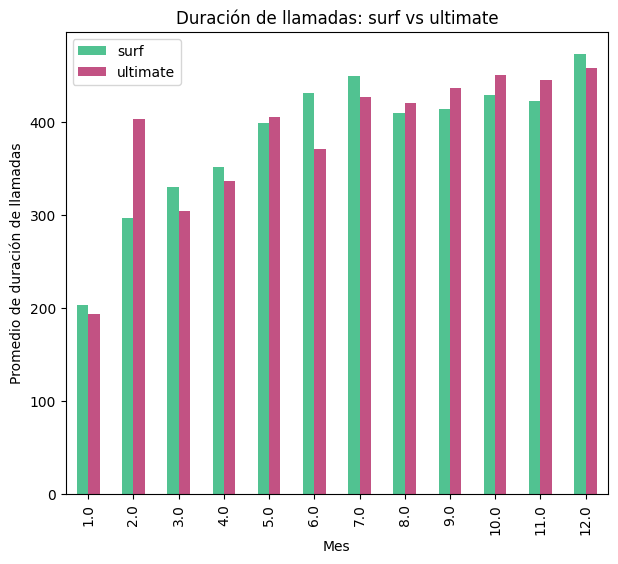

In [39]:
# Comparé la duración promedio de llamadas por cada plan y por cada mes. Tracé un gráfico de barras para visualizarla.
calls_mean_surf = data_plans.query('messages_included == 50').groupby('month')['call_minutes'].mean()
calls_mean_ultimate = data_plans.query('messages_included == 1000').groupby('month')['call_minutes'].mean()
call_mean = pd.concat([calls_mean_surf, calls_mean_ultimate], axis='columns')
call_mean.columns = range(call_mean.shape[1])
call_mean.rename(columns = {0:'surf', 1:'ultimate'}, inplace = True)
print(call_mean)
call_mean.plot(
    kind = 'bar',
    title = 'Duración de llamadas: surf vs ultimate',
    xlabel = 'Mes',
    ylabel = 'Promedio de duración de llamadas',
    color = ['#51C291','#C25283'],
    figsize = [7.0,6.0],)

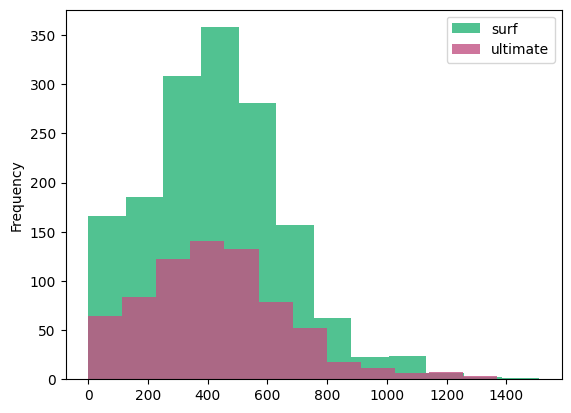

In [40]:
# Comparé el número de minutos mensuales que necesitan los usuarios de cada plan, trazando un histograma.
minutes_mean_surf = data_plans[data_plans['messages_included'] ==50]['call_minutes']
minutes_mean_ultimate = data_plans[data_plans['messages_included'] == 1000]['call_minutes']
minutes_mean_surf.plot(kind = 'hist', bins = 12, color = '#51C291')
minutes_mean_ultimate.plot(kind = 'hist',bins = 12, alpha = 0.8, color = '#C25283')
plt.legend(['surf', 'ultimate'])
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [41]:
# Calculé la media y la varianza de la duración mensual de llamadas.
mean_minutes = data_plans['call_minutes'].mean()
print('promedio de duración de llamadas:',mean_minutes)
var_minutes = data_plans['call_minutes'].var()
print('varianza:', var_minutes)

promedio de duración de llamadas: 429.2834714348016
varianza: 55847.17877118995


<AxesSubplot:>

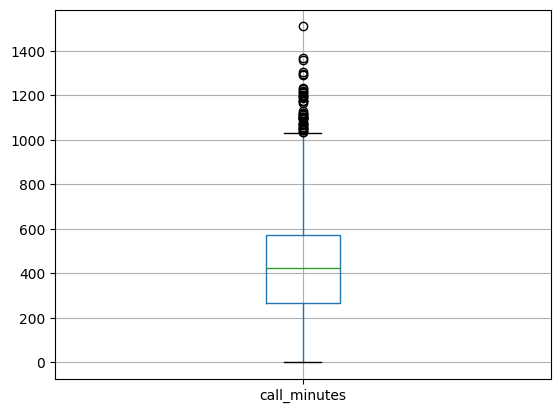

In [42]:
# Tracé un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
data_plans.boxplot(column = 'call_minutes')

In [64]:
# Podemos apreciar una diferencia en la duración promedio de llamadas en el mes de febrero, en este, los usuarios con el plan ultimate tuvieron una duración de llamada de hasta 100 minutos más que los usuarios del plan surf.

# Encontramos que la distribución de ambos planes son muy parecidas una a la otra, la distribución de surf tiene una desviación estándar más pequeña que la de ultimate.

#La duración de llamadas mensuales por encima de los 1000 minutos es atípica, por lo que se debería considerar si se ajusta un plan con un límite de duración de llamadas de 1000 minutos mensuales.

Analicé el comportamiento de los usuarios respecto a las <b>llamadas</b> en los planes <b>Surf</b> y <b>Ultimate</b>.

El análisis destaca una observación muy importante: la diferencia en la <b>duración promedio de las llamadas</b> entre ambos planes, especialmente en febrero, donde los usuarios del plan Ultimate hicieron llamadas significativamente más largas. Este tipo de detalle es valioso porque puede ayudar a la empresa a entender mejor el uso de los planes.

Además, reconocí correctamente que las distribuciones de llamadas para ambos planes son similares, con una <b>desviación estándar menor para Surf</b>, lo que refleja un comportamiento más consistente entre los usuarios de este plan. Este tipo de comparación es clave para evaluar cómo se utilizan los servicios de manera diferente entre los clientes.

Finalmente, al mencionar las llamadas <b>por encima de los 1000 minutos</b>, identifiqué un comportamiento atípico que puede ser importante para ajustar las tarifas. Esta observación podría tener un impacto directo en la oferta de los planes a los clientes que tienden a exceder ese límite.

En resumen, en este análisis identificamos puntos clave que pueden ayudar a <b>Megaline</b> a optimizar sus planes de llamadas. 
</div>

### Mensajes

            surf   ultimate
month                      
1.0    10.500000  15.500000
2.0    12.000000  21.571429
3.0    15.260870  20.250000
4.0    17.400000  22.047619
5.0    24.012987  32.103448
6.0    25.298969  29.340426
7.0    27.033058  32.830508
8.0    28.777778  38.478873
9.0    30.762887  37.895349
10.0   33.839662  39.443396
11.0   32.385159  38.606299
12.0   38.600629  45.006623


<AxesSubplot:title={'center':'Mensajes enviados: surf vs ultimate'}, xlabel='Mes', ylabel='Promedio de mensajes'>

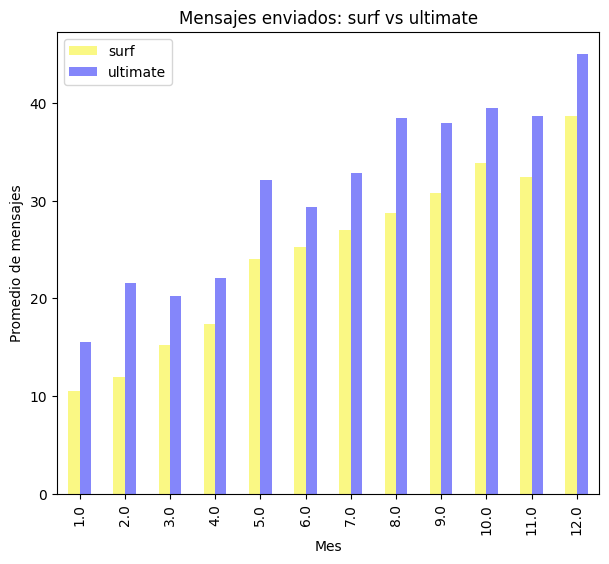

In [43]:
# Compraré el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_mean_surf = data_plans.query('messages_included == 50').groupby('month')['messages'].mean()
#print(calls_mean_surf)
messages_mean_ultimate = data_plans.query('messages_included == 1000').groupby('month')['messages'].mean()
#print(calls_mean_ultimate)
messages_mean = pd.concat([messages_mean_surf, messages_mean_ultimate], axis='columns')
messages_mean.columns = range(messages_mean.shape[1])
messages_mean.rename(columns = {0:'surf', 1:'ultimate'}, inplace = True)
print(messages_mean)
messages_mean.plot(
    kind = 'bar',
    title = 'Mensajes enviados: surf vs ultimate',
    xlabel = 'Mes',
    ylabel = 'Promedio de mensajes',
    color = ['#FAF884','#8486FA'],
    figsize = [7.0,6.0],)

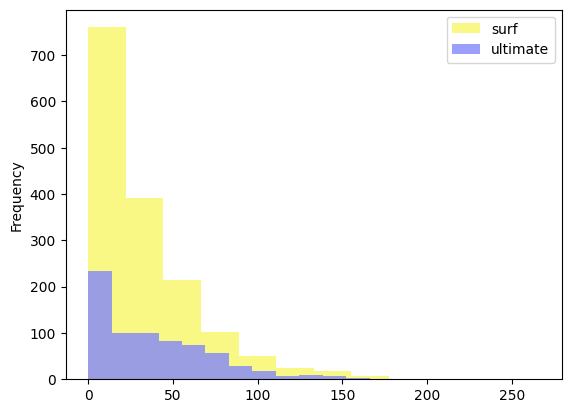

In [44]:
#histogramas de mensajes por plan
messages_surf = data_plans[data_plans['messages_included'] ==50]['messages']
#print(minutes_mean_surf)
messages_ultimate = data_plans[data_plans['messages_included'] == 1000]['messages']
#print(minutes_mean_ultimate)
messages_surf.plot(kind = 'hist', bins = 12, color = '#FAF884' )
messages_ultimate.plot(kind = 'hist',bins = 12, alpha = 0.8, color = '#8486FA')
plt.legend(['surf', 'ultimate'])
plt.show()

In [45]:
# media y desv.est para mensajes
print(data_plans.groupby('plan')['messages'].describe())

           count       mean        std  min  25%   50%   75%    max
plan                                                               
surf      1573.0  31.159568  33.566717  0.0  3.0  24.0  47.0  266.0
ultimate   720.0  37.551389  34.767179  0.0  7.0  30.0  61.0  166.0


<AxesSubplot:>

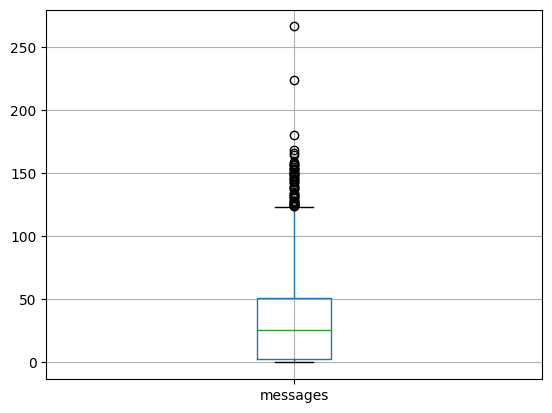

In [46]:
# diagrama de caja para mensajes
data_plans.boxplot(column = 'messages')

### Internet

            surf   ultimate
month                      
1.0     5.000000   7.250000
2.0    12.222222  17.285714
3.0    13.565217  18.416667
4.0    12.220000  16.333333
5.0    14.116883  16.862069
6.0    15.484536  15.425532
7.0    16.876033  16.491525
8.0    16.882716  17.845070
9.0    16.690722  17.011628
10.0   17.409283  17.716981
11.0   16.431095  17.118110
12.0   18.238994  18.397351


<AxesSubplot:title={'center':'Gigabytes usados: surf vs ultimate'}, xlabel='Mes', ylabel='Promedio de gb'>

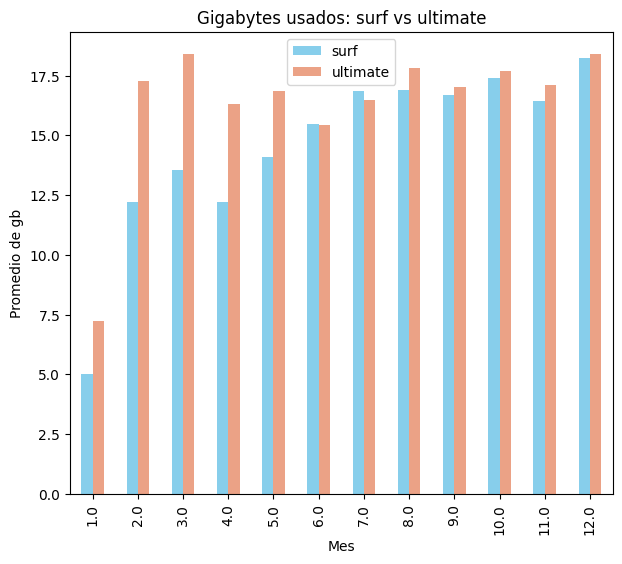

In [47]:
# Comparé la cantidad de tráfico de Internet consumido por usuarios por plan
gb_mean_surf = data_plans.query('messages_included == 50').groupby('month')['gb_used'].mean()
#print(calls_mean_surf)
gb_mean_ultimate = data_plans.query('messages_included == 1000').groupby('month')['gb_used'].mean()
#print(calls_mean_ultimate)
gb_mean = pd.concat([gb_mean_surf, gb_mean_ultimate], axis='columns')
gb_mean.columns = range(gb_mean.shape[1])
gb_mean.rename(columns = {0:'surf', 1:'ultimate'}, inplace = True)
print(gb_mean)
gb_mean.plot(
    kind = 'bar',
    title = 'Gigabytes usados: surf vs ultimate',
    xlabel = 'Mes',
    ylabel = 'Promedio de gb',
    color = ['#87CEEB','#EBA286'],
    figsize = [7.0,6.0],)

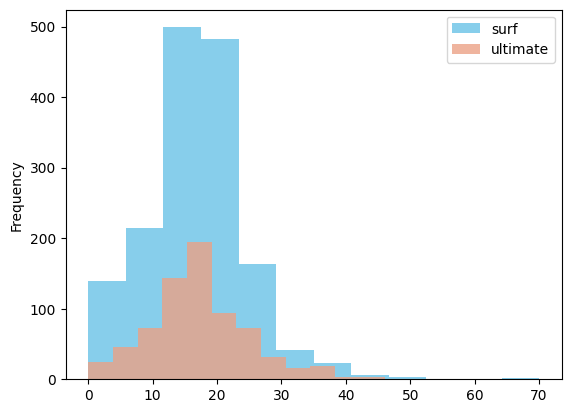

In [48]:
#histogramas de internet por plan
gb_surf = data_plans[data_plans['messages_included'] ==50]['gb_used']
gb_ultimate = data_plans[data_plans['messages_included'] == 1000]['gb_used']
gb_surf.plot(kind = 'hist', bins = 12, color = '#87CEEB' )
gb_ultimate.plot(kind = 'hist',bins = 12, alpha = 0.8, color = '#EBA286')
plt.legend(['surf', 'ultimate'])
plt.show()

In [49]:
# media y desv.est para mensajes
print(data_plans.groupby('plan')['gb_used'].describe())

           count       mean       std  min   25%   50%   75%   max
plan                                                              
surf      1573.0  16.670693  7.847522  0.0  12.0  17.0  21.0  70.0
ultimate   720.0  17.306944  7.670108  0.0  13.0  17.0  21.0  46.0


<AxesSubplot:>

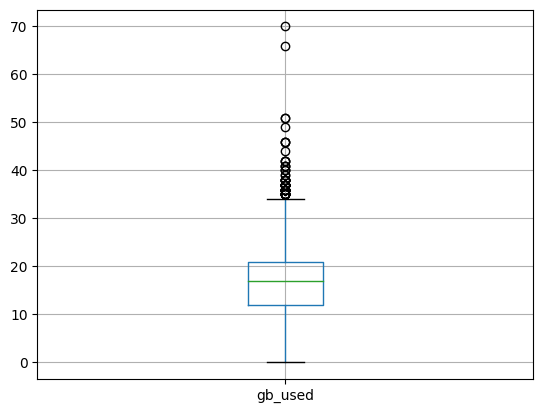

In [50]:
# diagrama de caja para mensajes
data_plans.boxplot(column = 'gb_used')

## Ingreso

            surf   ultimate
month                      
1.0    20.000000  70.000000
2.0    34.396667  70.000000
3.0    45.941304  74.666667
4.0    40.710600  73.000000
5.0    47.628182  70.724138
6.0    49.276289  71.638298
7.0    62.674050  71.898305
8.0    63.931173  72.859155
9.0    58.271495  72.034884
10.0   65.421224  72.311321
11.0   58.004276  71.708661
12.0   70.557044  73.291391


<AxesSubplot:title={'center':'Ingreso: surf vs ultimate'}, xlabel='Mes', ylabel='Promedio de ingreso'>

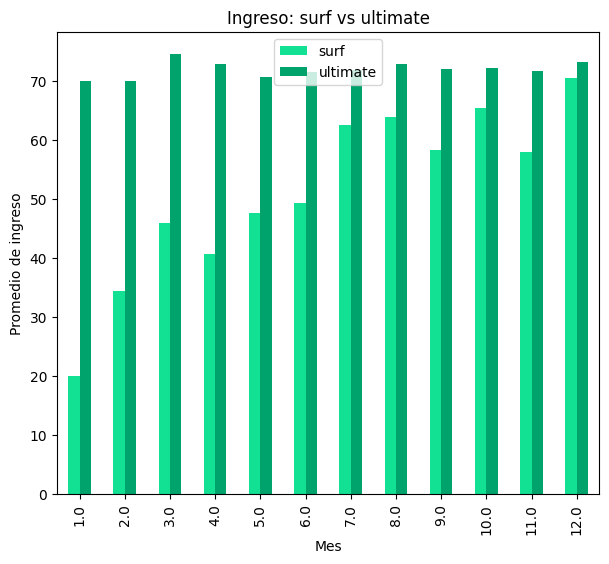

In [51]:
# Comparé el ingreso de los planes
pay_mean_surf = data_plans.query('messages_included == 50').groupby('month')['total_pay'].mean()
#print(calls_mean_surf)
pay_mean_ultimate = data_plans.query('messages_included == 1000').groupby('month')['total_pay'].mean()
#print(calls_mean_ultimate)
pay_mean = pd.concat([pay_mean_surf, pay_mean_ultimate], axis='columns')
pay_mean.columns = range(pay_mean.shape[1])
pay_mean.rename(columns = {0:'surf', 1:'ultimate'}, inplace = True)
print(pay_mean)
pay_mean.plot(
    kind = 'bar',
    title = 'Ingreso: surf vs ultimate',
    xlabel = 'Mes',
    ylabel = 'Promedio de ingreso',
    color = ['#12E193','#00A36C'],
    figsize = [7.0,6.0],)

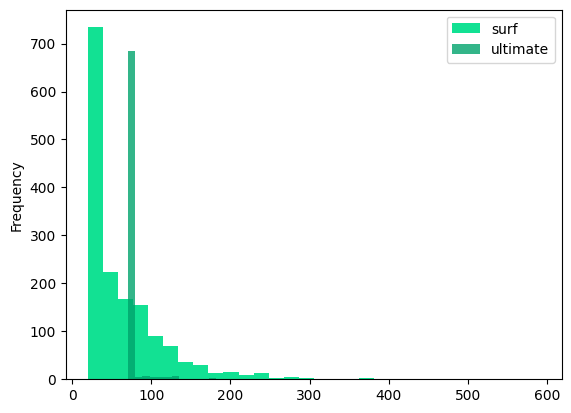

In [52]:
#histogramas de ingresos por plan
pay_surf = data_plans[data_plans['messages_included'] ==50]['total_pay']
#print(minutes_mean_surf)
pay_ultimate = data_plans[data_plans['messages_included'] == 1000]['total_pay']
#print(minutes_mean_ultimate)
pay_surf.plot(kind = 'hist', bins = 30, color = '#12E193' )
pay_ultimate.plot(kind = 'hist',bins = 12, alpha = 0.8, color = '#00A36C')
plt.legend(['surf', 'ultimate'])
plt.show()

In [53]:
# media y desviación estándard  para ingresos
print(data_plans.groupby('plan')['total_pay'].describe())

           count       mean        std   min   25%    50%    75%     max
plan                                                                    
surf      1573.0  60.706408  55.388042  20.0  20.0  40.36  80.36  590.37
ultimate   720.0  72.313889  11.395108  70.0  70.0  70.00  70.00  182.00


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

H0 = Los ingresos promedio de los usuarios con plan Ultimate y Surf son iguales

H1 = Los ingresos promedio de los usuarios con plan Ultimate son diferentes a los que tienen plan Surf

Escogeremos la prueba del valor p con una distribución Z

<AxesSubplot:>

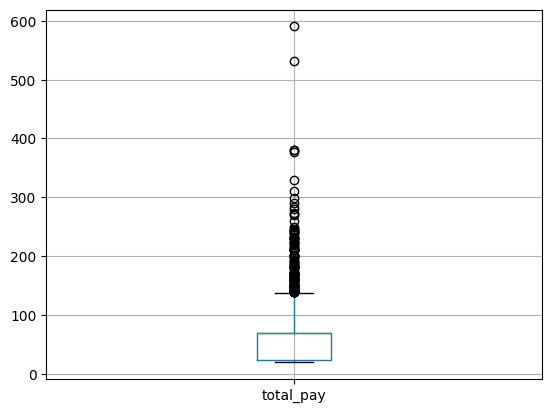

In [54]:
# diagrama de caja para ingreso
data_plans.boxplot(column = 'total_pay')

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elaboré las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [55]:
# Prueba de las hipótesis
alpha = 0.05
results_pay_plan = st.ttest_ind(pay_surf, pay_ultimate, equal_var = False)
print('valor p: ', results_pay_plan.pvalue)

if results_pay_plan.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se puede rechazar la hipótesis nula')

valor p:  3.1703905481135734e-15
Se rechaza la hipótesis nula


In [56]:
# H0 = El ingreso promedio de los usuarios de NY-NJ es igual que el de usuarios de otras regiones

# H1 = El ingreso promedio de los usuarios de NY-NJ es diferente al de usuarios de otras regiones

In [57]:
#Hacer Dataframe con la data que necesito
df_total_pay = data_plans[['user_id', 'total_pay']]
df_users_city = df_users[['user_id', 'city']]
df_users_city = df_users_city.merge(df_total_pay, on = 'user_id')
display(df_users_city)

,user_id,city,total_pay
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",20.00
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",20.00
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",90.09
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",60.00
...,...,...,...
2288,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",100.00
2289,1499,"Orlando-Kissimmee-Sanford, FL MSA",20.00
2290,1499,"Orlando-Kissimmee-Sanford, FL MSA",70.00
2291,1499,"Orlando-Kissimmee-Sanford, FL MSA",40.00


In [58]:
#El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones

In [59]:
#filtrar la data para obtener los grupos
ny_nj = df_users_city[df_users_city['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_pay']
print('promedio de ingreso de NY-NJ:',ny_nj.mean())
city_others = df_users_city[df_users_city['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_pay']
print('promedio de ingreso de otras regiones:',city_others.mean())

promedio de ingreso de NY-NJ: 59.921352785145885
promedio de ingreso de otras regiones: 65.2227713987474


In [60]:
# Prueba de las hipótesis
alpha = 0.05
results_city = st.ttest_ind(ny_nj, city_others, equal_var = True)
print('valor p: ', results_city.pvalue)

if results_city.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se puede rechazar la hipótesis nula')

valor p:  0.043557431621342436
Se rechaza la hipótesis nula



## Conclusión general

1.-La mayoría de los usuarios son del plan surf (1573) vs utimate(720)

2.-En la duración de llamadas no hay mucha diferencia si tomamos en cuenta el promedio de los usuarios surf vs ultimate. Los límites son 500 y 3000 respectivamente. En este caso, 1/4 de los usuarios con plan surf están pagando tarifas extra por exceder el límite de minutos en llamadas.

3.-En cuanto al promedio de mensajes enviados en el plan surf (31) vs ultimate (37) tampoco hay mucha diferencia. Los límites de mensajes son 50 y 100 respectivamente. En este caso a la mayoría de los usuarios les convendría tener el plan surf

4.- En cuanto a internet, surf tuvo un promedio de 16.7gb, esto quizás debido a usuarios atípicos (70gb), y el promedio para ultimate fue 17.3gb. Los límites de gb usados de cada plan son 15 y 30gb respectivamente. En este caso aproximadamente el 75% de los usuarios con el plan surf están pagando tarifas extras.

5.-En cuanto a ingresos por plan tenemos un promedio de 60.7 dls en el plan surf y 72.3 para el plan ultimate, asimismo, tenemos valores atípicos hacia la derecha, en el caso de surf tenemos un máximo de 590 vs ultimate con 182. En este caso, aproximadamente el 25% de los usuarios con plan surf están pagando aproximadamente 10 dls más que los usuarios con plan ultimate

Una estrategia para determinar si conviene o no adquirir cualquiera de los planes es observando la cantidad de gb que requiere el cliente. Debido a que la mayoría de los clientes utilizan más 15gb podríamos optar por una campaña que ofrezca alguna cantidad de GB de consumo que se encuentre en este rango de valores